In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!gcloud info

Google Cloud SDK [468.0.0]

Platform: [Linux, x86_64] uname_result(system='Linux', node='b2dad8150360', release='6.1.58+', version='#1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023', machine='x86_64')
Locale: ('en_US', 'UTF-8')
Python Version: [3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]]
Python Location: [/usr/bin/python3]
OpenSSL: [OpenSSL 3.0.2 15 Mar 2022]
Requests Version: [2.25.1]
urllib3 Version: [1.26.9]
Default CA certs file: [/tools/google-cloud-sdk/lib/third_party/certifi/cacert.pem]
Site Packages: [Disabled]

Installation Root: [N/A]
System PATH: [/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin]
Python PATH: [/tools/google-cloud-sdk/lib/third_party:/tools/google-cloud-sdk/lib:/env/python:/usr/lib/python310.zip:/usr/lib/python3.10:/usr/lib/python3.10/lib-dynload]
Cloud SDK on PATH: [False]
Kubectl on PATH: [False]

Installation Properties: [None]
User Config 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Business Case Studies/netflix.csv'

In [ ]:
dt = pd.read_csv(file_path)

In [ ]:
print(dt.shape)
dt.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
dt.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
dt["date_added"] = dt["date_added"].str.lstrip()

In [ ]:
dt["date_added"] = pd.to_datetime(dt["date_added"], format="%B %d, %Y")

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [ ]:
dt.shape

(8807, 12)

In [ ]:
dt.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [ ]:
# Convert the "country" column to a string data type
dt["country"] = dt["country"].astype(str)

In [ ]:
dt1 = dt[~dt["country"].str.contains(", ")]

In [ ]:
mt = dt[dt['country'].str.contains(',')]

In [ ]:
dt1.shape

(7491, 12)

# **Preliminary Assesment & Objectives of follwing case study:**


*   From initial assesment of the shape of dataset, thier are 8807 rows & 12 columns.
*   More than 2000 rows with missing values in director column & about 400 missing values in cast.
*   Some assumptions made during removal of rows with missing values like:


        1.   The missing values in Cast columns are not removed but replaced with 'Unkown'. This decision is taken after carefully analyzing the data.
        2.   This decision was taken because data of cast is not important for analyzing, in comparision data of Director and Country is more important.
        3.   Including the unknown values in the dataset will give us skewed values and insights, which will defeat the purpose of Case study.

*   The datatype of Date_Added is changed from OBJECT to datetime64, For ease of analysing the data.





# **Objectives:**

Start by exploring a few questions: What type of content is available in different countries?

    1. How has the number of movies released per year changed over the last 20-30 years?
    2. Comparison of tv shows vs. movies.
    3. What is the best time to launch a TV show?
    4. Analysis of actors/directors of different types of shows/movies.
    5. Does Netflix has more focus on TV Shows than movies in recent years
       Understanding what content is available in different countries


In [ ]:
a1= dt.copy()

In [ ]:
a1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5747 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5747 non-null   object        
 1   type          5747 non-null   object        
 2   title         5747 non-null   object        
 3   director      5747 non-null   object        
 4   cast          5747 non-null   object        
 5   country       5747 non-null   object        
 6   date_added    5747 non-null   datetime64[ns]
 7   release_year  5747 non-null   int64         
 8   rating        5747 non-null   object        
 9   duration      5747 non-null   object        
 10  listed_in     5747 non-null   object        
 11  description   5747 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 583.7+ KB


In [ ]:
a2=dt[dt['type'] == 'TV Show']

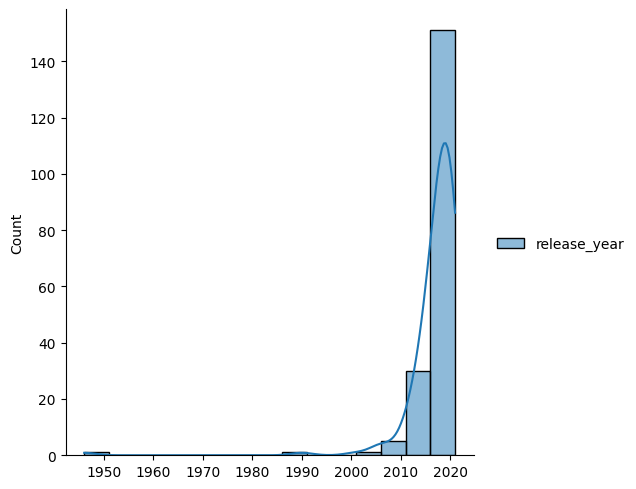

In [ ]:
sns.displot(data = a2,bins = 15,kde=True,fill=True,color= '#00FF00')

2. This answers our question that which year you should release a TV Show.
    
    -- It seems that coming years after 2020 seems tobe good time of make and release TV Shows.
    
    -- From 2010 to 2020 Number of movies made and released has increased by 3x .

In [ ]:
a4.reset_index()

,country,type,show_id
0,Canada,Movie,116
1,Canada,TV Show,3
2,India,Movie,881
3,India,TV Show,9
4,Spain,Movie,95
5,Spain,TV Show,11
6,United Kingdom,Movie,191
7,United Kingdom,TV Show,21
8,United States,Movie,1997
9,United States,TV Show,48


In [ ]:
a4.info()

<class 'pandas.core.series.Series'>
MultiIndex: 10 entries, ('Canada', 'Movie') to ('United States', 'TV Show')
Series name: show_id
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 437.0+ bytes


In [ ]:
a4 = a4.to_frame()

Okay from Below we have top 5 countries on netflix where majority of movies/TV Shows were released.

    -- From above we can understand that america & india has majority of movies released on platform.
    -- TV Shows is actually smallest contributor to netflix.
    -- Alone U.S. has about 2000 movies, While India has more than 800 movies.

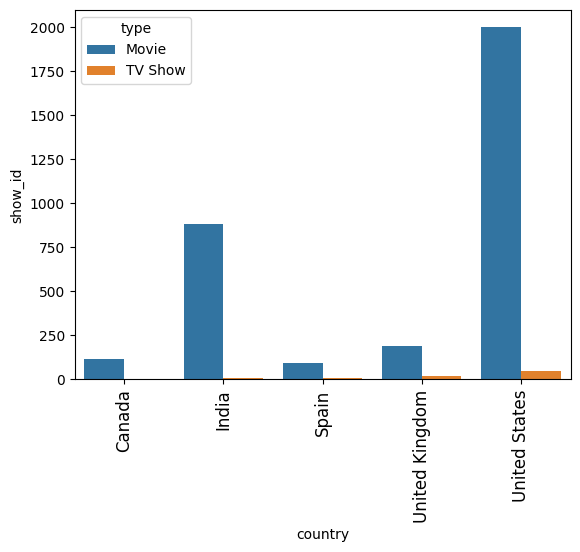

In [ ]:
sns.barplot(data=a4,x='country',y='show_id',hue='type')
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [ ]:
dt.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
dt.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


We can also use explode() function, which is better way to expand OR unnesting the nested columns

In [ ]:
# Unlisting Directors column i.e. expanding the cell with multiple director's name for single TV Show/Movie
dt_dir = dt['director'].apply(lambda x : str(x).split(', ')).tolist()
dt_dir = pd.DataFrame(dt_dir,index=dt['title'])
dt_dir = dt_dir.stack()
dt_dir = pd.DataFrame(dt_dir.reset_index())
dt_dir.rename(columns={0:'director'},inplace=True)
dt_dir.drop(['level_1'],axis = 1,inplace=True )
dt_dir

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [ ]:
# Unlisting Cast i.e. expanding the cast column having multiple cast member in one cell will be expanding
dt_cast = dt['cast'].apply(lambda x: str(x).split(', ')).tolist()
dt_cast = pd.DataFrame(dt_cast,index = dt['title'])
dt_cast = dt_cast.stack()
dt_cast = pd.DataFrame(dt_cast.reset_index())
dt_cast.rename(columns = {0:'actors'},inplace = True)
dt_cast.drop('level_1',inplace = True,axis = 1)
dt_cast

,title,actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [ ]:
# Unlisting country column i.e. expanding the cell haveing more than one values
dt_coun = dt['country'].apply(lambda x : str(x).split(', ')).tolist()
dt_coun = pd.DataFrame(dt_coun,index=dt['title'])
dt_coun = dt_coun.stack()
dt_coun = dt_coun.reset_index()
dt_coun.rename(columns = {0:'country'},inplace= True)
dt_coun.drop('level_1',inplace = True,axis = 1)
dt_coun

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10840,Zodiac,United States
10841,Zombie Dumb,nan
10842,Zombieland,United States
10843,Zoom,United States


In [ ]:
# Unlisting listed_in for same reasons as before
dt_genr = dt['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
dt_genre = pd.DataFrame(dt_genr,index = dt['title'])
dt_genre = dt_genre.stack()
dt_genre = pd.DataFrame(dt_genre.reset_index())
dt_genre.rename(columns={0:'genre'},inplace = True)
dt_genre.drop('level_1',inplace=True,axis=1)
dt_genre.head()

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


Now we willmerge the data set into 1

In [ ]:
dt_1 = dt_dir.merge(dt_cast,on=['title'],how='inner')
dt_2 = dt_1.merge(dt_genre,on=['title'],how='inner')
dt_3 = dt_2.merge(dt_coun, on =['title'],how='inner')
dt_3

,title,director,actors,genre,country
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa
...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,International Movies,India
201987,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals,India
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,India
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,India


In [ ]:
dt_3.isnull().sum()

title       0
director    0
actors      0
genre       0
country     0
dtype: int64

In [ ]:
# Replace the nan values of director, actors with UNKNOWN

dt_3['actors'].replace(['nan'],['Unknown Actor'],inplace=True)
dt_3['director'].replace(['nan'],['Unknown Director'],inplace=True)
dt_3['country'].replace(['nan'],[np.nan],inplace=True)
dt_3.head()

,title,director,actors,genre,country
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa


In [ ]:
## MERGING our UNESTED Data with ORIGINAL Data
dt_final = dt_3.merge(dt[['show_id', 'type', 'title', 'date_added','release_year', 'rating', 'duration']],on='title',how='left')
dt_final.head()

,title,director,actors,genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90 min
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons


In [ ]:
dt_final.isna().sum()

title               0
director            0
actors              0
genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

In [ ]:
dt_final['rating'].value_counts()

TV-MA       73867
TV-14       43931
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          1
84 min          1
66 min          1
Name: rating, dtype: int64

In [ ]:
dt_final.loc[dt_final['duration'].isnull()]

,title,director,actors,genre,country,show_id,type,date_added,release_year,rating,duration
126537,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,s5542,Movie,2017-04-04,2017,74 min,NaN
131603,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,s5795,Movie,2016-09-16,2010,84 min,NaN
131737,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,s5814,Movie,2016-08-15,2015,66 min,NaN


In [ ]:
# Ratings can't be MIN, It has to be changed to NR- NOT RATED
# From ABove we can confirm that values of duration column where values are missing
# have shifted to rating column due to some reasons. We can fill those values from rating column.
dt_final.loc[dt_final['duration'].isnull(),'duration'] = dt_final.loc[dt_final['duration'].isnull(),'duration'].fillna(dt_final['rating'])
dt_final.loc[dt_final['rating'].str.contains('min',na=False),'rating']='NR'
dt_final['rating'].fillna('NR',inplace=True)
pd.set_option('display.max_rows',None)

In [ ]:
dt_final.isna().sum()

title               0
director            0
actors              0
genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating              0
duration            0
dtype: int64

In [ ]:
#just an attempt to observe nulls in date_added column
dt_final[dt_final['date_added'].isnull()].head()

,title,director,actors,genre,country,show_id,type,date_added,release_year,rating,duration
136893,A Young Doctor's Notebook and Other Stories,Unknown Director,Daniel Radcliffe,British TV Shows,United Kingdom,s6067,TV Show,NaT,2013,TV-MA,2 Seasons
136894,A Young Doctor's Notebook and Other Stories,Unknown Director,Daniel Radcliffe,TV Comedies,United Kingdom,s6067,TV Show,NaT,2013,TV-MA,2 Seasons
136895,A Young Doctor's Notebook and Other Stories,Unknown Director,Daniel Radcliffe,TV Dramas,United Kingdom,s6067,TV Show,NaT,2013,TV-MA,2 Seasons
136896,A Young Doctor's Notebook and Other Stories,Unknown Director,Jon Hamm,British TV Shows,United Kingdom,s6067,TV Show,NaT,2013,TV-MA,2 Seasons
136897,A Young Doctor's Notebook and Other Stories,Unknown Director,Jon Hamm,TV Comedies,United Kingdom,s6067,TV Show,NaT,2013,TV-MA,2 Seasons


In [ ]:
dt_final[dt_final['date_added'].isnull()]['release_year'].unique()

array([2013, 2018, 2003, 2008, 2010, 2012, 2016, 2015])

In [ ]:
dt_final[dt_final['release_year']==2013]['date_added'].mode().values[0]

numpy.datetime64('2019-04-09T00:00:00.000000000')

In [ ]:
# we are filling the date_added column where thevalues are missing,
# we are substituting the mode of release year column.
for i in dt_final[dt_final['date_added'].isnull()]['release_year'].unique():
  imp = dt_final[dt_final['release_year'] == i]['date_added'].mode().values[0]
  dt_final.loc[dt_final['release_year'] == i,'date_added'] = dt_final.loc[dt_final['release_year'] == i,'date_added'].fillna(imp)

Only Country column is having alot of missing values.

Date _added column is fixed.

In [ ]:
dt_final.isna().sum()

title               0
director            0
actors              0
genre               0
country         11897
show_id             0
type                0
date_added          0
release_year        0
rating              0
duration            0
dtype: int64

In [ ]:
# Doing same for country column
# A list of directors of missing countries is made, which is then checked with the non missing countries directors to only make changes to those who are present in missing
# directors list.
for i in dt_final[dt_final['country'].isnull()]['director'].unique():
  if i in dt_final[~dt_final['country'].isnull()]['director'].unique(): # We are checking that whether the directors of misssing country column are actually in non-missing
  # directors list, so that the comparison can be done
    imp = dt_final[dt_final['director'] == i]['country'].mode().values[0]
    dt_final.loc[dt_final['director'] == i,'country'] = dt_final.loc[dt_final['director'] == i,'country'].fillna(imp)

In [ ]:
dt_final.isna().sum()
# So their are more than 4000 directors who are unique, who doesn't come in list of directors who have countries.

title              0
director           0
actors             0
genre              0
country         4276
show_id            0
type               0
date_added         0
release_year       0
rating             0
duration           0
dtype: int64

In [ ]:
for i in dt_final[dt_final['country'].isnull()]['actors'].unique():
  if i in dt_final[~dt_final['country'].isnull()]['actors'].unique():
    imp=dt_final[dt_final['actors']==i]['country'].mode().values[0]
    dt_final.loc[dt_final['actors']==i,'country']=dt_final.loc[dt_final['actors']==i,'country'].fillna(imp)

In [ ]:
dt_final['country'].fillna('Unknown Country',inplace=True)
dt_final.isnull().sum()

title           0
director        0
actors          0
genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [ ]:
dt_final['duration'].value_counts()

1 Season      35035
2 Seasons      9559
3 Seasons      5084
94 min         4343
106 min        4040
97 min         3624
95 min         3560
96 min         3484
93 min         3480
90 min         3305
105 min        3209
107 min        3103
101 min        3048
102 min        3017
103 min        2985
98 min         2984
99 min         2956
91 min         2915
92 min         2863
104 min        2822
88 min         2781
110 min        2711
100 min        2697
108 min        2614
112 min        2594
85 min         2486
89 min         2420
86 min         2213
4 Seasons      2134
116 min        2122
118 min        2119
119 min        2075
87 min         2063
109 min        2020
113 min        1990
120 min        1845
117 min        1770
121 min        1728
5 Seasons      1698
111 min        1667
124 min        1590
114 min        1529
127 min        1505
115 min        1444
123 min        1398
125 min        1299
122 min        1298
84 min         1268
128 min        1241
130 min        1216


In [ ]:
#removing mins from data
dt_final['duration']=dt_final['duration'].str.replace(" min","")
dt_final.head()

,title,director,actors,genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons


The Values in Duratioin column is very much segregated, we can add duration of movies in bins/range.

In [ ]:
df = dt_final.copy()

In [ ]:
df.head()

,title,director,actors,genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons


In [ ]:
df['dur'] = df['duration']
df.head()

,title,director,actors,genre,country,show_id,type,date_added,release_year,rating,duration,dur
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,90
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2 Seasons


In [ ]:
df.loc[df['dur'].str.contains(' Season'),'dur']=0
df['dur'] = df['dur'].astype('int')
df.head()

,title,director,actors,genre,country,show_id,type,date_added,release_year,rating,duration,dur
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,90
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0


In [ ]:
df['dur'].describe()

count    201991.000000
mean         77.152789
std          52.269154
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: dur, dtype: float64

In [ ]:
bins1 = [-1,1,50,80,100,120,150,200,315]
labels = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
df['dur'] = pd.cut(df['dur'],bins=bins1,labels = labels)
df.head()

,title,director,actors,genre,country,show_id,type,date_added,release_year,rating,duration,dur
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,80-100
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,<1
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,<1
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,<1
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,<1


In [ ]:
df.loc[~df['duration'].str.contains(' Season'),'duration'] = df.loc[~df['duration'].str.contains(' Season'),'dur']

In [ ]:
df.drop(['dur'],axis =1 ,inplace = True)
df.head()

,title,director,actors,genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,80-100
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons


In [ ]:
df['duration'].value_counts()

80-100        52937
100-120       48724
1 Season      35035
120-150       26691
2 Seasons      9559
50-80          7700
150-200        6737
3 Seasons      5084
1-50           2530
4 Seasons      2134
5 Seasons      1698
7 Seasons       843
6 Seasons       633
200-315         524
8 Seasons       286
9 Seasons       257
10 Seasons      220
13 Seasons      132
12 Seasons      111
15 Seasons       96
17 Seasons       30
11 Seasons       30
Name: duration, dtype: int64

In [ ]:
df[df['country']=='India']['title'].value_counts()

X: Past Is Present                                                  264
Navarasa                                                            198
Ray                                                                 171
Pitta Kathalu                                                       136
Ajeeb Daastaans                                                     132
Lust Stories                                                        132
Ghost Stories                                                       120
Bioscope                                                             96
Paava Kadhaigal                                                      88
Bombay Talkies                                                       72
Chillar Party                                                        66
Ankahi Kahaniya                                                      63
Shikari                                                              60
Shor In the City                                                

In [ ]:
# replace the Brackets with empty space
df['title'] = df['title'].str.replace(r"\(.*\)","")
df.head()

<ipython-input-40-3bf8114896a9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace(r"\(.*\)","")


,title,director,actors,genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,80-100
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons


***Data Cleaning is Completed and we can go to Analysis***

Distribution of Titles:

    What is the total number of titles available on Netflix?
    How many titles fall under each genre?
    How many titles are movies and how many are TV shows?
    What is the range of release years for the content?

Analyzing Ratings:

    What is the average rating across all titles?
    What is the median rating?
    What is the distribution of ratings?
    What is the standard deviation of ratings?

Analyzing Duration:

    What is the average duration of movies and TV shows separately?
    What is the minimum and maximum duration of content?
    What is the distribution of durations?



Distribution of Titles

In [ ]:
df['title'].nunique()
# More than 8000 Title's Available on Netflix.

8791

In [ ]:
df.groupby(['genre'])['title'].nunique().sort_values(ascending = False)

genre
International Movies            2738
Dramas                          2418
Comedies                        1673
International TV Shows          1351
Documentaries                    869
Action & Adventure               854
TV Dramas                        763
Independent Movies               756
Children & Family Movies         639
Romantic Movies                  615
TV Comedies                      581
Thrillers                        573
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 372
Romantic TV Shows                370
Horror Movies                    353
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                 

**International Movies        
Dramas                          
Comedies                        
International TV Shows**

*These 4 Genre Dominate the platform, All of these genre's has more than 1000 movies under them.*

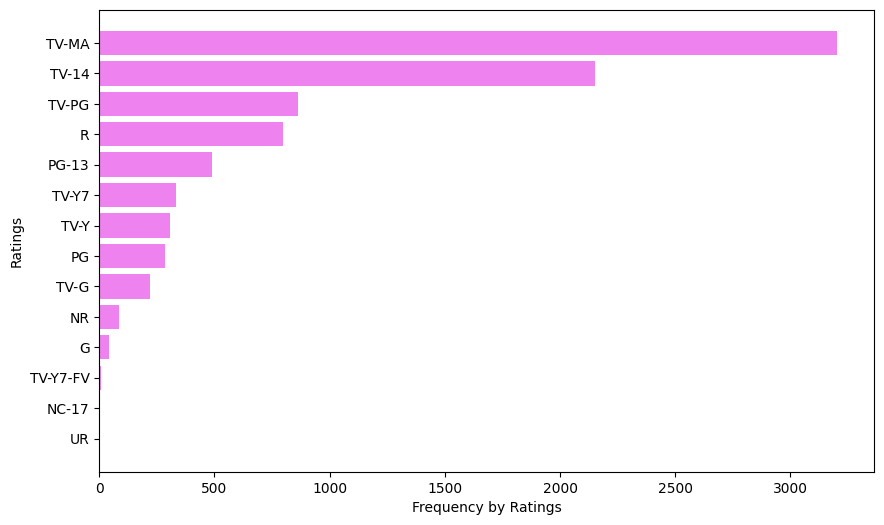

In [ ]:
df_rating=df.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(10,6))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

Both  Movies & TV Shows content have content more catered toward **'TV-MA'**

# **By Country Analysis**

In [ ]:
df['country'] = df['country'].str.replace(',', '')
df.groupby(['country']).agg({"title":"nunique"})

,title
country,
,3
Afghanistan,1
Albania,1
Algeria,3
Angola,2
Argentina,94
Armenia,1
Australia,162
Austria,12


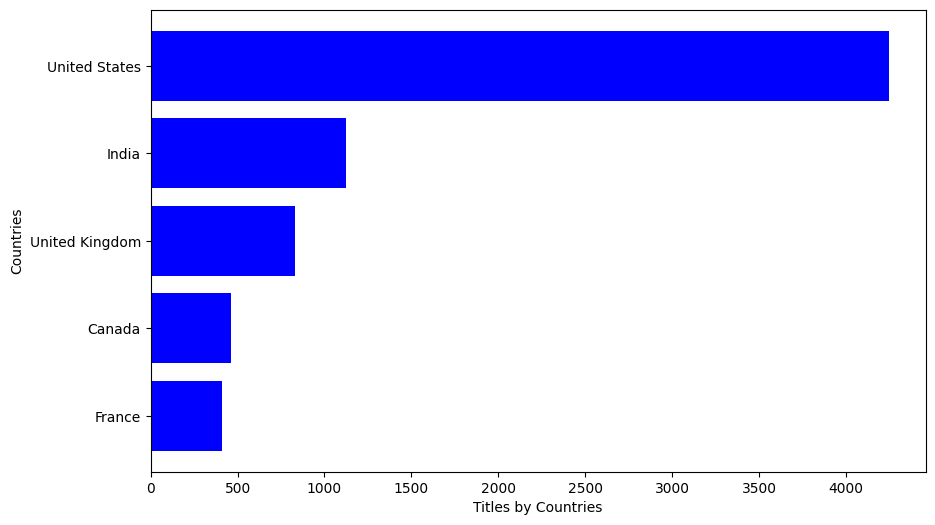

In [ ]:
df_country=df.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]
plt.figure(figsize=(10,6))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'],color=['blue'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

# TYPE Analysis

In [ ]:
mv = df.groupby(['type'])['title'].nunique().values[0]
tv = df.groupby(['type'])['title'].nunique().values[1]
mv_p = round((mv/df['title'].nunique())*100,2)
tv_p = round((tv/df['title'].nunique())*100,2)

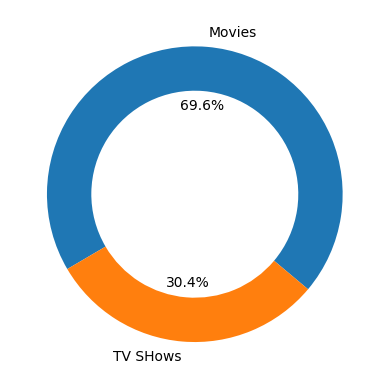

In [ ]:

labels = ['Movies', 'TV SHows']
sizes = [mv_p,tv_p]
fig = plt.figure(20)
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=-40, wedgeprops=dict(width=0.3))

So Movies are a very big section of Netflix's Catalog, TV Shows are at 2nd psoition with 30% share.

In [ ]:
print(df['release_year'].min(),df['release_year'].max())

1925 2021


So Netflix has a wide range of content, Movies/Tv Shows from **1925 to 2021**

In [ ]:
df.head()

,title,director,actors,genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,80-100
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons


# **DURATION** Analysis


In [ ]:
q = df[df['type'] == 'Movie']['duration'].value_counts().reset_index()

In [ ]:
q1 = q.values[:,:1].tolist()
q2 = q.values[:,1:].tolist()


In [ ]:
q1 = np.ravel(q1)
q2 = np.ravel(q2)

In [ ]:
q2 = pd.to_numeric(q2)

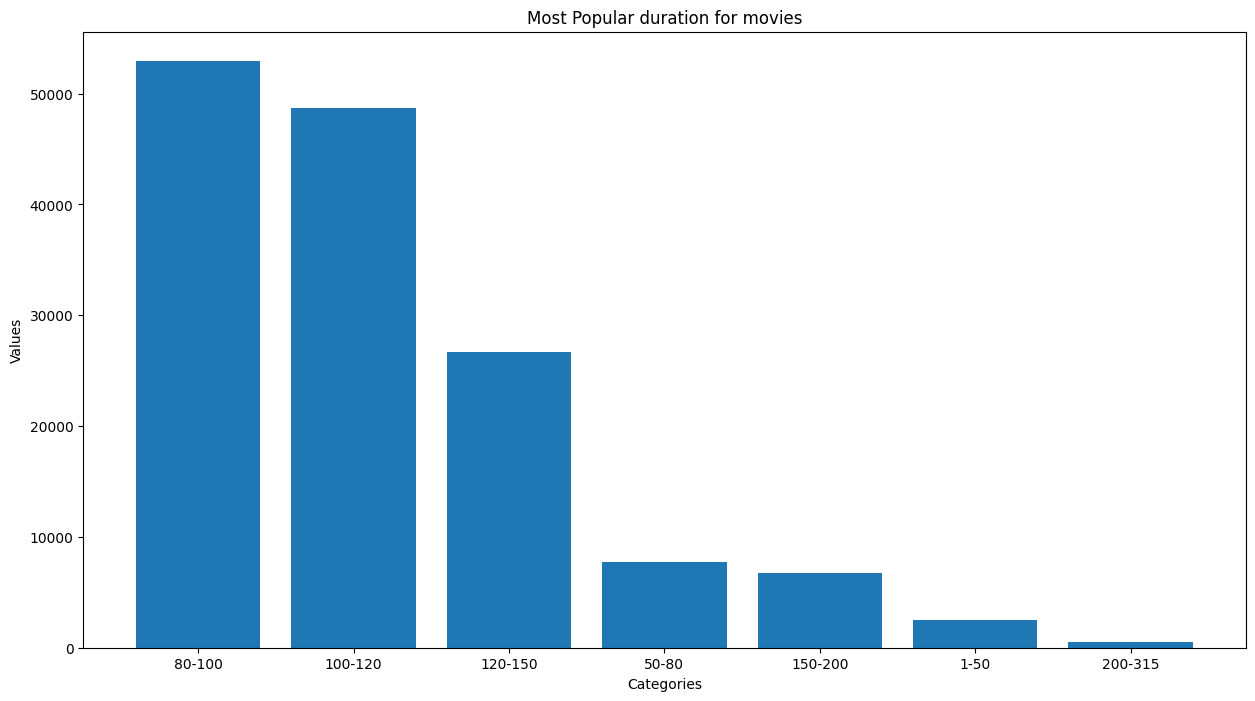

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(q1, q2)
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Most Popular duration for movies")
plt.show()

Movies which have duration of **80-100 & 100-120 mins**
is the most popular.

**With movies longer than 3 hour's are least popular on Platform.**


In [ ]:
q = df[df['type'] == 'TV Show']['duration'].value_counts().reset_index()
q1 = q.values[:,:1].tolist()
q2 = q.values[:,1:].tolist()
q1 = np.ravel(q1)
q2 = np.ravel(q2)
q2 = pd.to_numeric(q2)

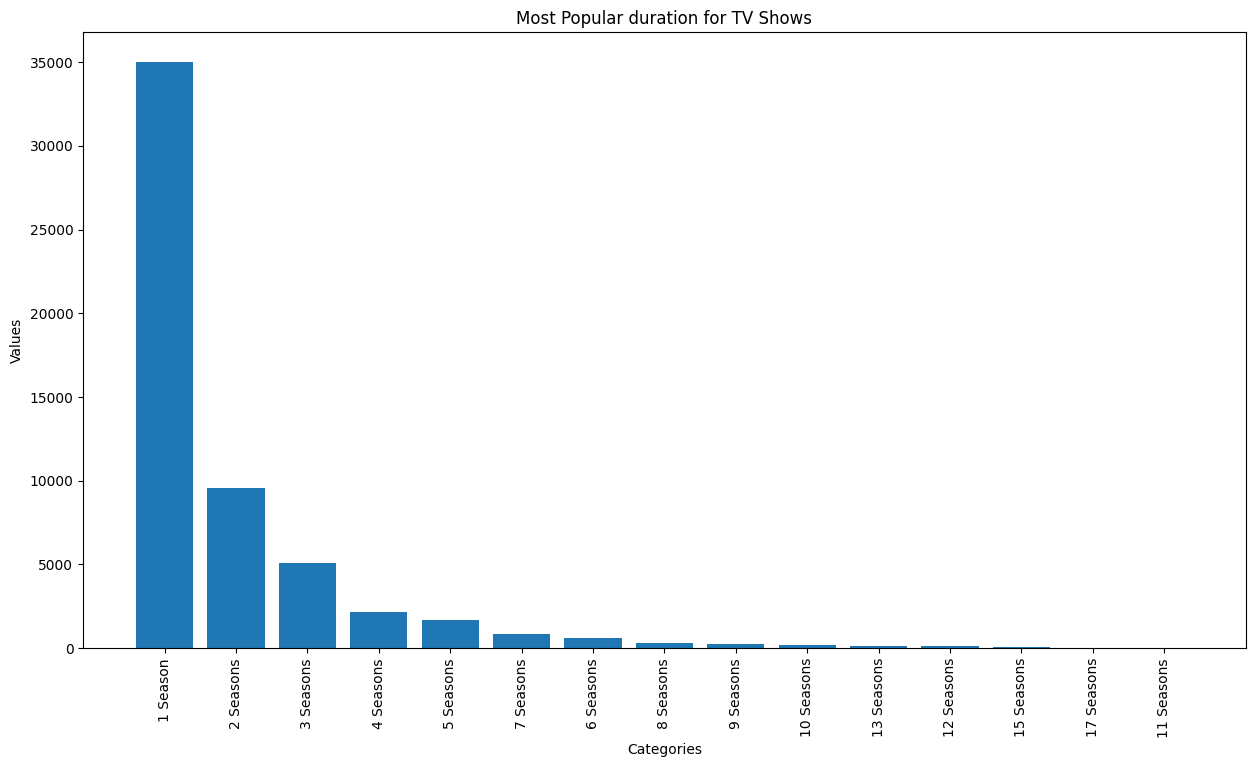

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(q1, q2)
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Most Popular duration for TV Shows")
plt.xticks(rotation=90)
plt.show()

TV Shows with only 1 Season is the most popular, We see a sharp drop when in popularity when Seasons are longer than 1.

# Analysis for Actors & Directors

Actor Analysis:

    Which actors have appeared in the most Netflix titles? (Analyze the 'actors' column)

    Are there any actors who consistently appear in highly-rated content? (Combine information from 'actors' and 'rating' columns)

    For a specific actor, what is the average rating of the titles they've been in? (Group by the actor and calculate average rating)

    Which genres do specific actors most frequently appear in? (Combine 'actors' and 'genre' columns)
    
    How does the average watch time differ for movies/shows starring specific actors? (Consider incorporating additional data on watch time)


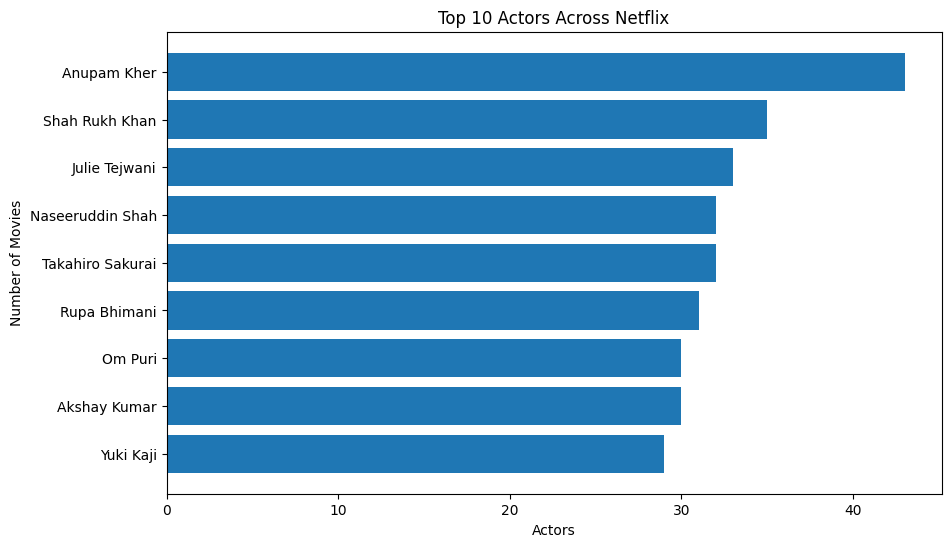

In [ ]:
data = df.groupby(['actors'])['title'].nunique().sort_values(ascending=False).head(10)[1:]
plt.figure(figsize=(10, 6))
plt.barh(data.index[::-1], data.values[::-1])
plt.xlabel("Actors")
plt.ylabel("Number of Movies")
plt.title("Top 10 Actors Across Netflix")
#plt.xticks(rotation=90)
plt.show()

Interestingly,

  -- Anupam Kher tops the list

Let's see the list for Actors by popularity for India & America.

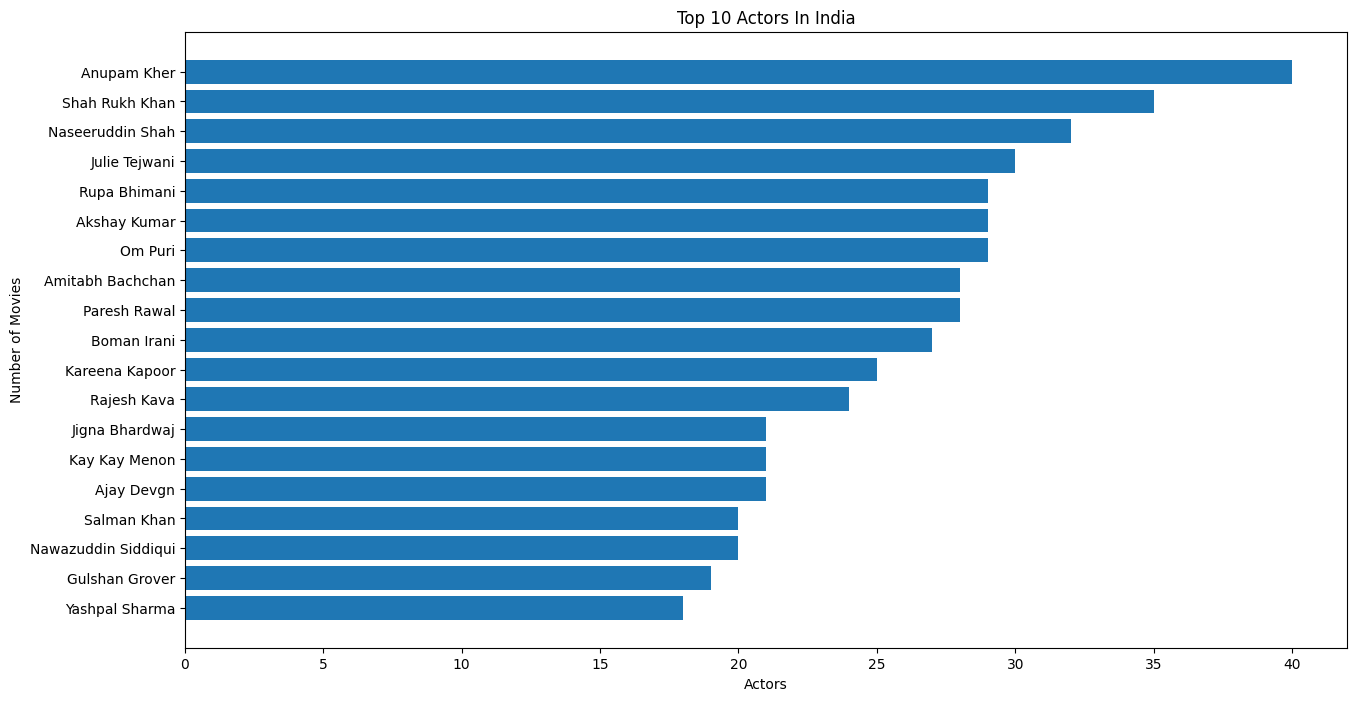

In [ ]:
data = df[df['country'] == 'India'].groupby(['actors'])['title'].nunique().sort_values(ascending=False).head(20)[1:]
plt.figure(figsize=(15, 8))
plt.barh(data.index[::-1], data.values[::-1])
plt.xlabel("Actors")
plt.ylabel("Number of Movies")
plt.title("Top 10 Actors In India")
#plt.xticks(rotation=90)
plt.show()

Again for India, Anupam Kher surprisingly defeats SRK.

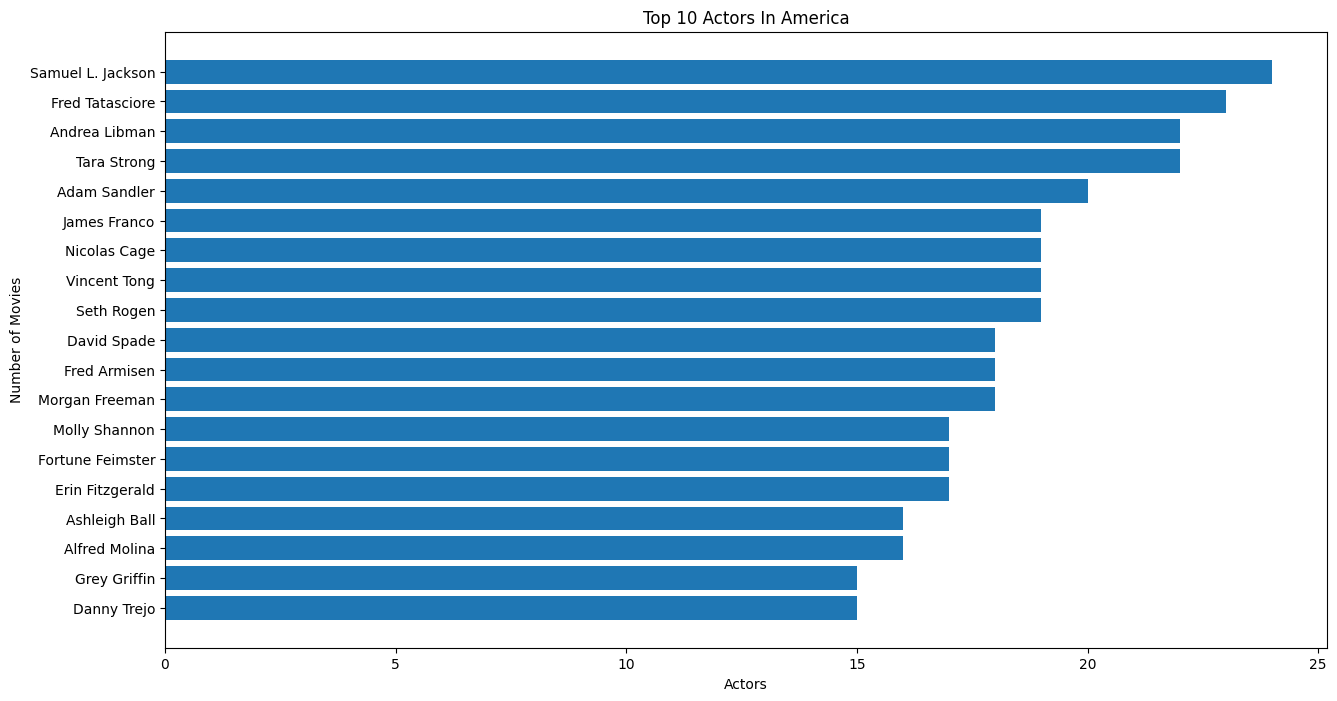

In [ ]:
data = df[df['country'] == 'United States'].groupby(['actors'])['title'].nunique().sort_values(ascending=False).head(20)[1:]
plt.figure(figsize=(15, 8))
plt.barh(data.index[::-1], data.values[::-1])
plt.xlabel("Actors")
plt.ylabel("Number of Movies")
plt.title("Top 10 Actors In America")
#plt.xticks(rotation=90)
plt.show()

-- Samuel L. Jackson is the most popular on netlfix.

-- Age is also factor for this category.


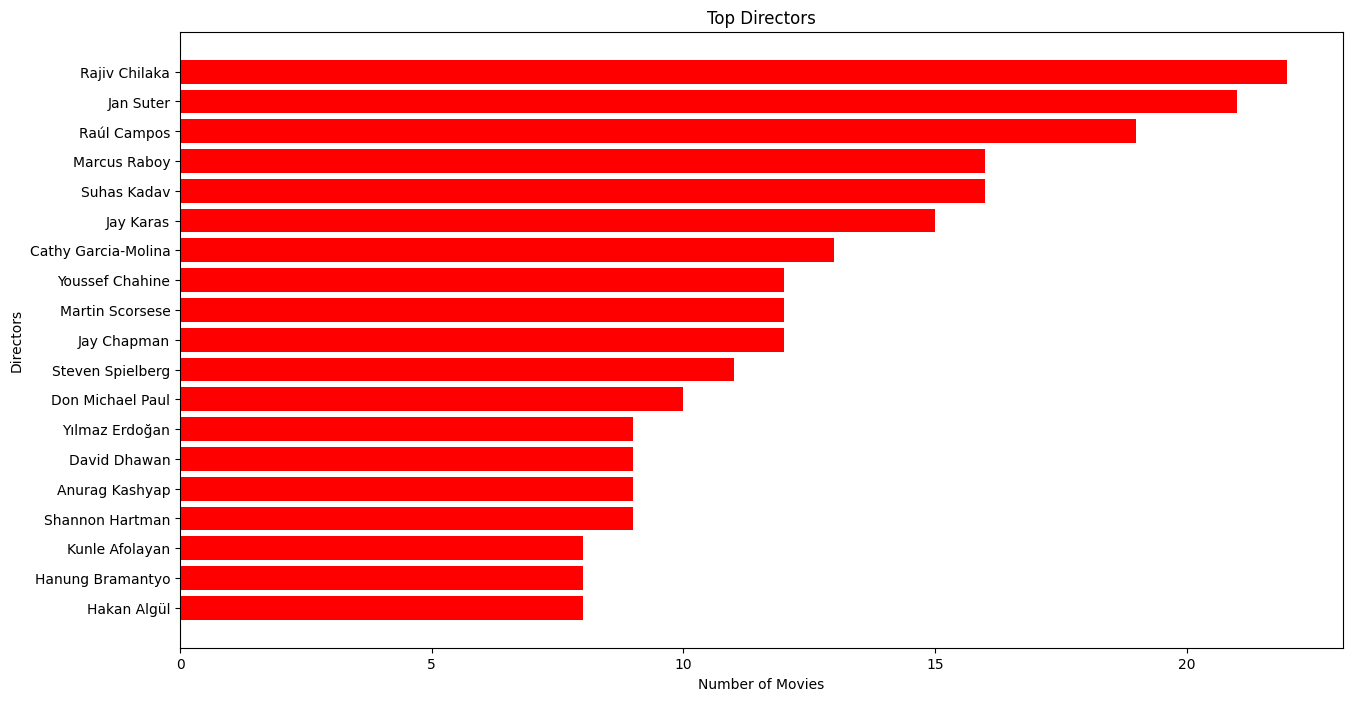

In [ ]:
data = dy.groupby(['director'])['title'].nunique().sort_values(ascending = False).head(20)[1:]
plt.figure(figsize=(15, 8))
plt.barh(data.index[::-1], data.values[::-1],color='red')
plt.ylabel("Directors")
plt.xlabel("Number of Movies")
plt.title("Top Directors")
#plt.xticks(rotation=90)
plt.show()

Top directors accross netflix::
  
  --  Rajiv Chilaka tops the list, He is the creator of Chota Bheem etc.
  
  --  We see some known names like Martin Scorcese, Steven Spielberg & Anurag Kashyap.

In [ ]:
dy = df.copy()

In [ ]:
dy['year'] = dy['date_added'].dt.year
dy['month'] = dy['date_added'].dt.month

In [ ]:
dy.head()

,title,director,actors,genre,country,show_id,type,date_added,release_year,rating,duration,year,month
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,80-100,2021,9
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9


Let's Analyse the data on yearly data,
Specifically Focusing on  how many titles were added each year.

In [ ]:
dy.groupby(['year'])['title'].nunique().reset_index()[::-1]

,year,title
13,2021,1497
12,2020,1877
11,2019,2012
10,2018,1651
9,2017,1185
8,2016,432
7,2015,82
6,2014,24
5,2013,11
4,2012,3


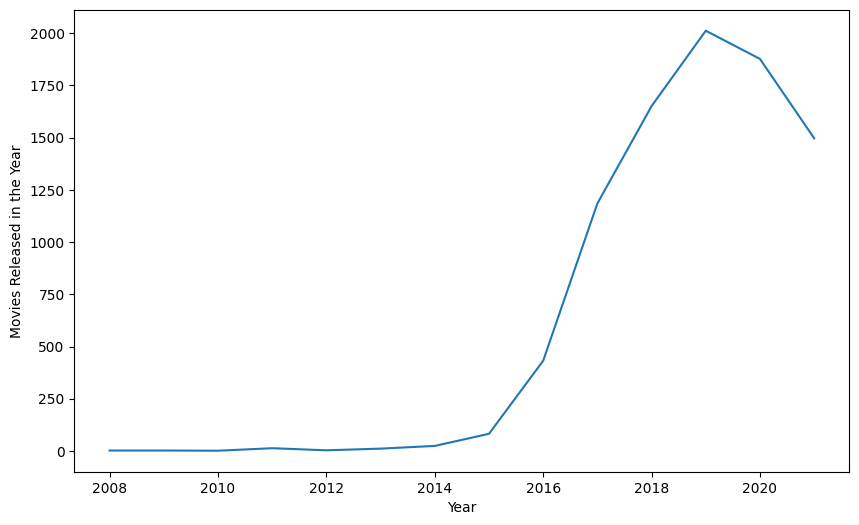

In [ ]:
df_year=dy.groupby(['year']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

The Amount of Content across Netflix has increased from 2008 continuously till 2019. The dip is probably due to COVID

In [ ]:
dy.groupby(['director'])['title'].nunique().sort_values(ascending = False).head(10)[1:]

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Name: title, dtype: int64